In [1]:
# Fuentes y recursos
# http://rstudio-pubs-static.s3.amazonaws.com/230133_fb9cb3c35ca345d0b9e5726ed3f45a21.html

# Datos
# https://drive.google.com/open?id=0B-dmEvN59Z2ZQWhFekd3ZnRVajA

# Cargamos y exploramos los datos
data <- read.csv("binClassData.csv")
colnames(data)[4] <- "AirQuality"
head(data)
summary(data)

PRECIPITATION.mm.,X,Y,AirQuality
9.3,-1.0979873,1.5628576,UH
0.1,-2.6024521,-0.9487586,UH
0.0,-3.2381999,0.1079880,UH
0.0,1.8079804,1.8124036,UH
0.0,1.4822315,1.4734618,UH
0.1,0.1958432,2.3618945,UH


 PRECIPITATION.mm.       X                 Y           AirQuality
 Min.   : 0.000    Min.   :-6.2335   Min.   :-4.1552   H : 407   
 1st Qu.: 0.000    1st Qu.:-1.3730   1st Qu.: 0.5688   UH:1180   
 Median : 0.100    Median :-0.6092   Median : 1.1641             
 Mean   : 3.111    Mean   :-0.5081   Mean   : 0.9816             
 3rd Qu.: 3.111    3rd Qu.: 0.6110   3rd Qu.: 1.5546             
 Max.   :40.300    Max.   : 2.8472   Max.   : 3.8945             

In [2]:
# Construiremos un conjunto de entrenamiento y prueba
# Entrenamiento: 75% de los datos
# Prueba: 25%

# Defenimos la semilla para tener todos la misma partición
set.seed(100)
sample.size <- floor(0.75 * nrow(data))
samp <- sample(1:nrow(data), sample.size)
d_train <- data[samp,]
d_test <- data[-samp,]
summary(d_train)
summary(d_test)

 PRECIPITATION.mm.       X                 Y           AirQuality
 Min.   : 0.000    Min.   :-5.9131   Min.   :-3.2338   H :311    
 1st Qu.: 0.000    1st Qu.:-1.3822   1st Qu.: 0.6012   UH:879    
 Median : 0.100    Median :-0.6407   Median : 1.1713             
 Mean   : 3.069    Mean   :-0.5242   Mean   : 0.9859             
 3rd Qu.: 3.075    3rd Qu.: 0.5854   3rd Qu.: 1.5626             
 Max.   :40.200    Max.   : 2.8472   Max.   : 3.8945             

 PRECIPITATION.mm.       X                 Y           AirQuality
 Min.   : 0.000    Min.   :-6.2335   Min.   :-4.1552   H : 96    
 1st Qu.: 0.000    1st Qu.:-1.3270   1st Qu.: 0.4952   UH:301    
 Median : 0.100    Median :-0.5558   Median : 1.1363             
 Mean   : 3.239    Mean   :-0.4601   Mean   : 0.9685             
 3rd Qu.: 3.200    3rd Qu.: 0.7443   3rd Qu.: 1.5162             
 Max.   :40.300    Max.   : 2.8152   Max.   : 3.2627             

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


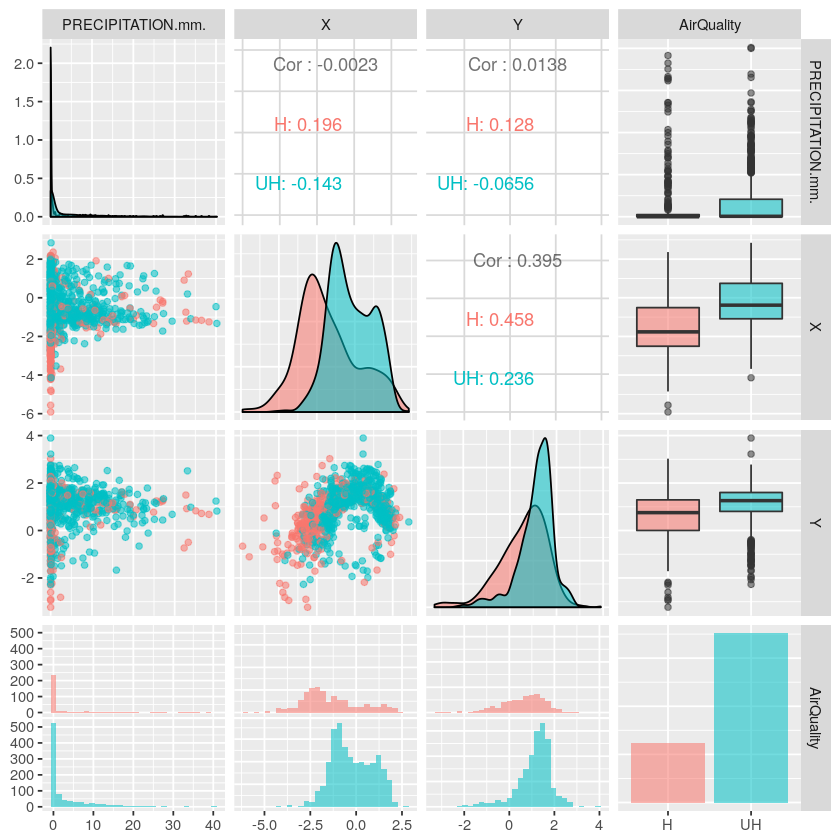

In [3]:
library(ggplot2); library(GGally)
ggpairs(d_train, aes(colour = AirQuality, alpha = 0.4))

In [4]:
# glm: Generalized Linear Models
# Ver: https://www.statmethods.net/advstats/glm.html

# Vamos a modelar (~) AirQuality a partir del resto de los datos (.) 
# indicamos esto con un punto: AirQuality ~ .
# family binomial hace una regresión logística para una clase binaria
aq.model <- glm(formula=AirQuality ~ ., data=d_train, family = 'binomial')
summary(aq.model)


Call:
glm(formula = AirQuality ~ ., family = "binomial", data = d_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4780  -0.6482   0.5089   0.7444   1.8318  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       1.167521   0.143850   8.116 4.81e-16 ***
PRECIPITATION.mm. 0.007017   0.011651   0.602 0.547007    
X                 0.596410   0.064594   9.233  < 2e-16 ***
Y                 0.351407   0.090661   3.876 0.000106 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1367.2  on 1189  degrees of freedom
Residual deviance: 1169.7  on 1186  degrees of freedom
AIC: 1177.7

Number of Fisher Scoring iterations: 4


In [5]:
# Vamos a usar nuestro modelo para predecir sobre el conjunto de prueba
# t_data[1:3], excluimos la clase (columna AirQuality)
# type = "response" gives the predicted probabilities

predicted_val <- predict(aq.model, d_test[1:3], type="response")

# Creamos un dataframe con las etiquetas y el valor estimado
prediction <- data.frame(d_test, predicted_val)
head(prediction)

,PRECIPITATION.mm.,X,Y,AirQuality,predicted_val
3,0.0,-3.2381999,0.107988,UH,0.3261112
7,0.0,0.9999189,2.324019,H,0.9296000
10,0.8,-1.3269607,1.817051,UH,0.7350207
11,0.9,-2.1661149,1.228025,UH,0.5777346
13,0.2,-2.0230682,1.272515,UH,0.6009721
15,4.6,0.5110701,2.324480,UH,0.9106377


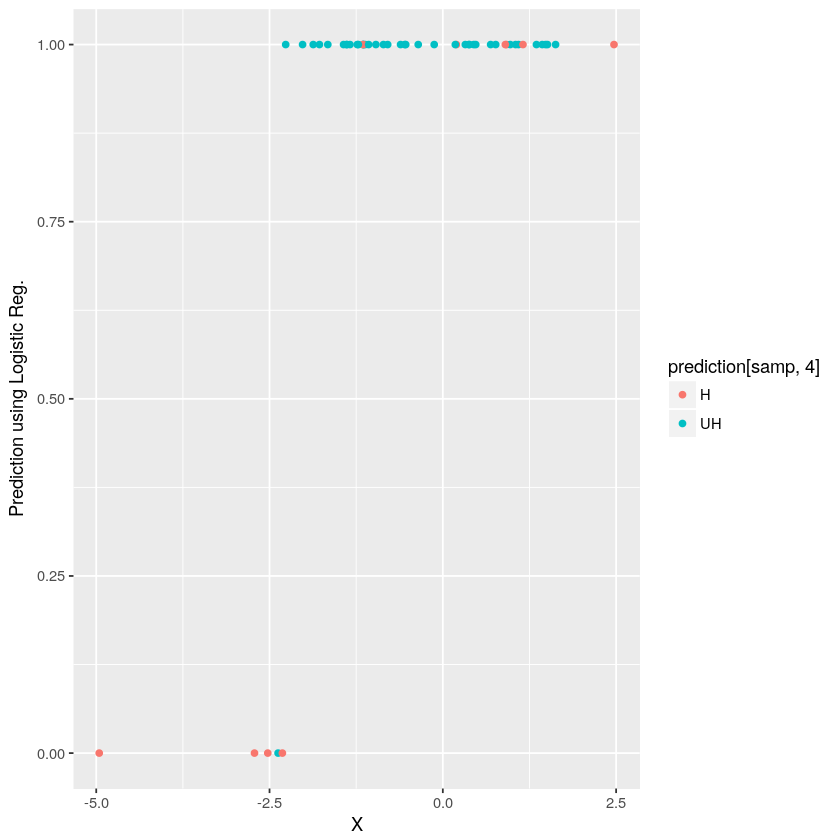

In [6]:
# Mostramos el resultado de la predicción prediction[samp, 5] columna 5
# para 50 valores al azar usando la 
# variable X (prediction[samp, 2]) como referencia
# samp es una muestra aleatoria (instancias)

set.seed(0)
sample.size <- 50
samp <- sample(1:nrow(prediction), sample.size)

qplot(prediction[samp, 2], round(prediction[samp, 5]), 
      col=prediction[samp, 4], xlab = 'X', ylab = 'Prediction using Logistic Reg.')

In [7]:
summary(prediction[prediction$AirQuality == 'UH',])

 PRECIPITATION.mm.       X                 Y          AirQuality
 Min.   : 0.00     Min.   :-4.4929   Min.   :-4.155   H :  0    
 1st Qu.: 0.00     1st Qu.:-1.0901   1st Qu.: 0.614   UH:301    
 Median : 0.20     Median :-0.3547   Median : 1.193             
 Mean   : 3.19     Mean   :-0.2003   Mean   : 1.047             
 3rd Qu.: 3.70     3rd Qu.: 0.9728   3rd Qu.: 1.533             
 Max.   :29.10     Max.   : 1.9759   Max.   : 2.992             
 predicted_val    
 Min.   :0.05064  
 1st Qu.:0.71539  
 Median :0.82011  
 Mean   :0.78176  
 3rd Qu.:0.89958  
 Max.   :0.93838  

In [8]:
summary(prediction[prediction$AirQuality == 'H',])

 PRECIPITATION.mm.       X                  Y           AirQuality
 Min.   : 0.000    Min.   :-6.23348   Min.   :-2.6362   H :96     
 1st Qu.: 0.000    1st Qu.:-2.62272   1st Qu.: 0.2352   UH: 0     
 Median : 0.000    Median :-1.39300   Median : 0.7303             
 Mean   : 3.395    Mean   :-1.27466   Mean   : 0.7225             
 3rd Qu.: 1.125    3rd Qu.:-0.01233   3rd Qu.: 1.4184             
 Max.   :40.300    Max.   : 2.81524   Max.   : 3.2627             
 predicted_val    
 Min.   :0.06596  
 1st Qu.:0.42926  
 Median :0.63151  
 Mean   :0.62873  
 3rd Qu.:0.85586  
 Max.   :0.95363  

In [9]:
# Transformaremos el resultado de nuestra predicción (probabilidad)
# En una etiqueta H, UH, usando un umbral theta_p=0.5

prediction$predicted_class <- ifelse(prediction$predicted_val<0.5, "H", "UH")
head(prediction)

,PRECIPITATION.mm.,X,Y,AirQuality,predicted_val,predicted_class
3,0.0,-3.2381999,0.107988,UH,0.3261112,H
7,0.0,0.9999189,2.324019,H,0.9296000,UH
10,0.8,-1.3269607,1.817051,UH,0.7350207,UH
11,0.9,-2.1661149,1.228025,UH,0.5777346,UH
13,0.2,-2.0230682,1.272515,UH,0.6009721,UH
15,4.6,0.5110701,2.324480,UH,0.9106377,UH


In [10]:
# Mostramos la calidad de la clasificación

library(caret)

# confusionMatrix(predicted.Values, reference.Values)
confusionMatrix(prediction$predicted_class, prediction$AirQuality)

# Ver: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

Loading required package: lattice


Confusion Matrix and Statistics

          Reference
Prediction   H  UH
        H   35  11
        UH  61 290
                                          
               Accuracy : 0.8186          
                 95% CI : (0.7771, 0.8553)
    No Information Rate : 0.7582          
    P-Value [Acc > NIR] : 0.002319        
                                          
                  Kappa : 0.3988          
 Mcnemar's Test P-Value : 7.709e-09       
                                          
            Sensitivity : 0.36458         
            Specificity : 0.96346         
         Pos Pred Value : 0.76087         
         Neg Pred Value : 0.82621         
             Prevalence : 0.24181         
         Detection Rate : 0.08816         
   Detection Prevalence : 0.11587         
      Balanced Accuracy : 0.66402         
                                          
       'Positive' Class : H               
                                          